In [7]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("crime_data.csv")
df["cmplnt_fr_dt"] = pd.to_datetime(df["cmplnt_fr_dt"])



def validate_time(row):
    res = True
    if ":" not in row:
        res = False
    return res
df["time_validation"] = df["cmplnt_fr_tm"].apply(validate_time)
df = df[df["time_validation"] == True]
df["cmplnt_fr_tm"] = pd.to_datetime(df["cmplnt_fr_tm"],format="%H:%M:%S").dt.time
df.drop("time_validation",axis=1,inplace=True)
df = df[df["ofns_desc"]!="(null)"]

EDA

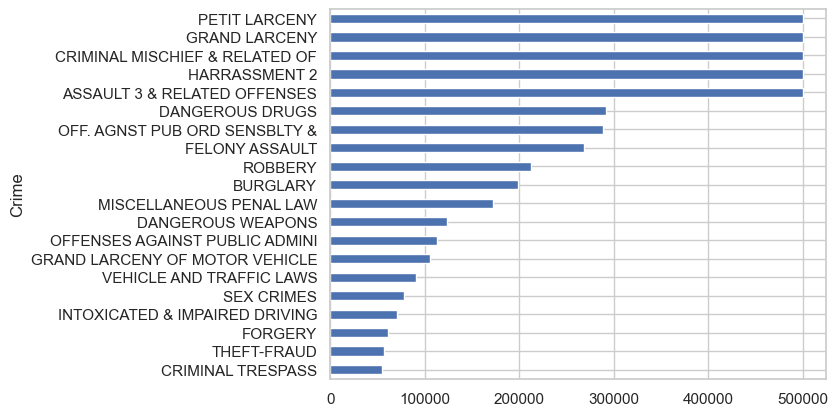

<Figure size 1200x800 with 0 Axes>

In [6]:
offense_description_and_counts = df["ofns_desc"].value_counts(normalize=False,ascending=False)[:20].sort_values().plot(kind="barh",ylabel="Crime")
plt.figure(figsize=(12, 8))
ax = offense_description_and_counts.plot(kind="barh", ylabel="Crime")


plt.show()


In [3]:
monthly_counts = df.groupby(df["cmplnt_fr_dt"].dt.month).count()
monthly_counts.drop(["cmplnt_fr_tm","ofns_desc"],axis=1,inplace=True)
monthly_counts.rename(columns={"cmplnt_fr_dt":"Month_count"},inplace=True)
monthly_counts.rename(index={"cmplnt_fr_dt":"Month"},inplace=True)
monthly_counts.index.name = "Month"
monthly_counts.reset_index(drop=False,inplace=True)
months = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
monthly_counts["Month"].replace(months,inplace=True)


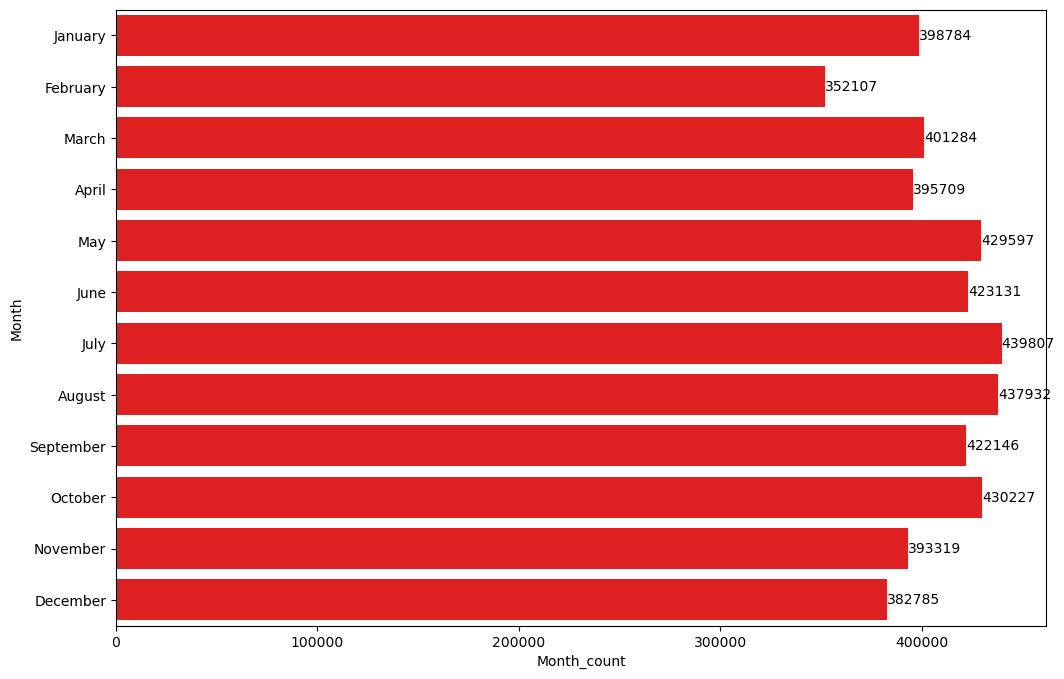

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(monthly_counts, y="Month", x="Month_count", color="red")

# Add total numbers to the end of each column
for i, count in enumerate(monthly_counts["Month_count"]):
    plt.annotate(str(count), xy=(count, i), ha='left', va='center')
    

plt.show()


<Axes: xlabel='Month', ylabel='Month_count'>

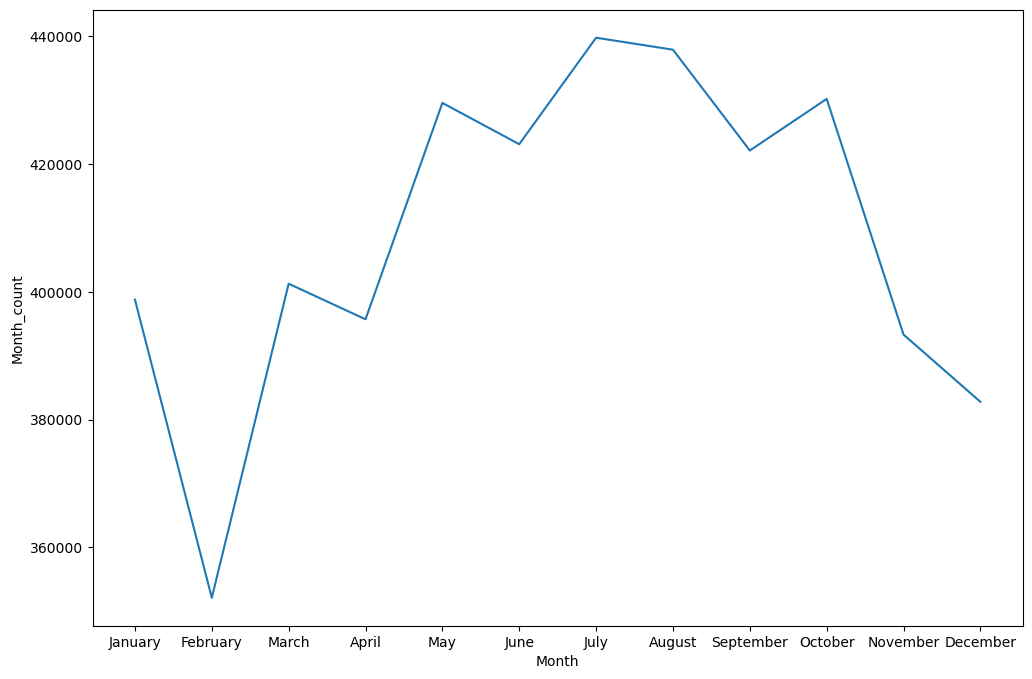

In [5]:
plt.figure(figsize=(12,8))
sns.lineplot(monthly_counts,x="Month",y="Month_count")